In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from math import floor

from ml_tb.plot import plot_sequence_all_zones, plot_sequence_all_zones_circles, zone_to_number

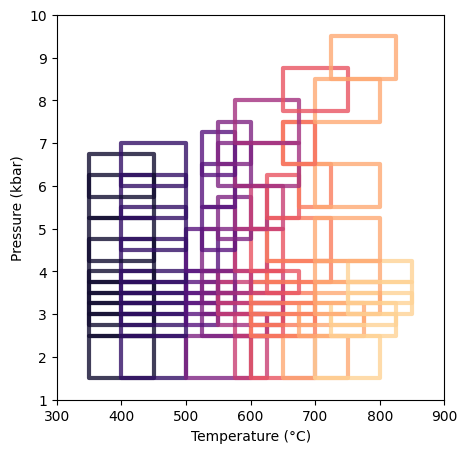

In [2]:
fig, ax = plt.subplots()

plot_sequence_all_zones("1a", "magma", ax=ax)
plot_sequence_all_zones("1b", "magma", ax=ax)
plot_sequence_all_zones("1c", "magma", ax=ax)

plot_sequence_all_zones("2a", "magma", ax=ax)
plot_sequence_all_zones("2b", "magma", ax=ax)
plot_sequence_all_zones("2c", "magma", ax=ax)

plot_sequence_all_zones("3", "magma", ax=ax)

plot_sequence_all_zones("4a", "magma", ax=ax)
plot_sequence_all_zones("4b", "magma", ax=ax)

plot_sequence_all_zones("5", "magma", ax=ax)

ax.set_xlim(300, 900)
ax.set_ylim(1.0, 10)

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Pressure (kbar)")

fig.set_size_inches(5, 5)

# fig.savefig("sequences_1c_2a_3_4a_5.pdf")

In [3]:
# load excel file
data = pd.read_excel(Path("..", "01_fit_natural_biotite", "Metapelite-Database_Bt_CLEAN_2024-02-03.xlsx"))
# replace all MAS values with strings
data["MAS"] = data["MAS"].astype(str)
data["Zone number"] = list(map(zone_to_number, data["Zone"], data["MAS"]))

# get number of samples in each MAS/zone combination
# group data by MAS and zone
data_grouped = data.groupby(["MAS", "Zone number"]).size()

data_grouped.loc["3"]

print("Min. number of samples in a MAS/zone combination:", data_grouped.min())
print("Max. number of samples in a MAS/zone combination:", data_grouped.max())

Min. number of samples in a MAS/zone combination: 1
Max. number of samples in a MAS/zone combination: 160


(1.0, 10.0)

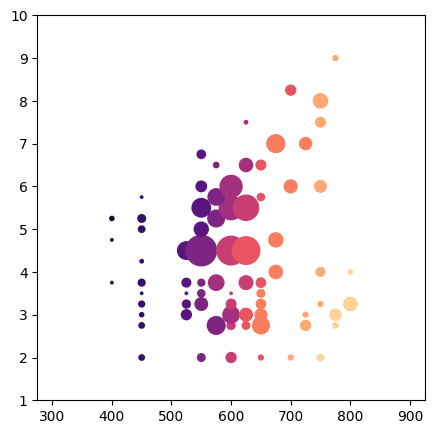

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_sequence_all_zones_circles("1a", "magma", ax=ax, n_samples=data_grouped.loc["1a"])
plot_sequence_all_zones_circles("1b", "magma", ax=ax, n_samples=data_grouped.loc["1b"])
plot_sequence_all_zones_circles("1c", "magma", ax=ax, n_samples=data_grouped.loc["1c"])

plot_sequence_all_zones_circles("2a", "magma", ax=ax, n_samples=data_grouped.loc["2a"])
plot_sequence_all_zones_circles("2b", "magma", ax=ax, n_samples=data_grouped.loc["2b"])
plot_sequence_all_zones_circles("2c", "magma", ax=ax, n_samples=data_grouped.loc["2c"])

plot_sequence_all_zones_circles("3", "magma", ax=ax, n_samples=data_grouped.loc["3"])

plot_sequence_all_zones_circles("4a", "magma", ax=ax, n_samples=data_grouped.loc["4a"])
plot_sequence_all_zones_circles("4b", "magma", ax=ax, n_samples=data_grouped.loc["4b"])

plot_sequence_all_zones_circles("4a/4b/5", "magma", ax=ax, n_samples=data_grouped.loc["4a/4b/5"])

plot_sequence_all_zones_circles("5", "magma", ax=ax, n_samples=data_grouped.loc["5"])

ax.set_xlim(275, 925)
ax.set_ylim(1.0, 10)

# fig.savefig(Path("exported_figs", "Samples_in_PT.pdf"), dpi=400)

(1.0, 10.0)

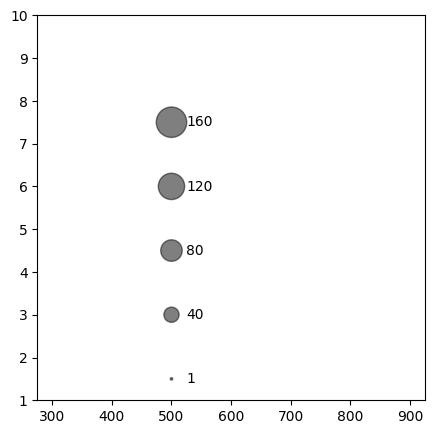

In [5]:
# plot ref circles for legend
fig, ax = plt.subplots(figsize=(5, 5))

ref_sizes = np.linspace(0, 160, 5)
ref_sizes[0] = 1

x_positions = np.repeat(500, 5)
y_positions = [1.5, 3, 4.5, 6, 7.5]

ax.scatter(x_positions, y_positions, s=3*ref_sizes, c="black", alpha=0.5)
for size, y in zip(ref_sizes, y_positions):
    ax.text(525, y, f"{size:.0f}", verticalalignment="center")

ax.set_xlim(275, 925)
ax.set_ylim(1.0, 10)

# fig.savefig(Path("exported_figs", "Legend_Samples_in_PT.pdf"), dpi=400)

# Print some number about the dataset

In [6]:
print("Number of samples in the database:", data.shape[0])

Number of samples in the database: 2148


In [7]:
print("Number of sequences: ", len(data["Sequence locality"].unique()))

Number of sequences:  121


In [8]:
print("Min/Max temperature: ", data["Temperature random ordered after Ti-in-Bt"].min(), data["Temperature random ordered after Ti-in-Bt"].max())

Min/Max temperature:  400.3301561799244 849.406347095289


In [9]:
print("Min/Max pressure: ", data["Pressure estimate random uniform"].min(), data["Pressure estimate random uniform"].max())

Min/Max pressure:  1.50087585471849 9.493926970462892
